In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
''' train and test path '''
train_path = 'C:/Users/SURESH A/Downloads/BT/Training'
test_path = 'C:/Users/SURESH A/Downloads/BT/Testing'

In [7]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [8]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])     
    count=count+1

In [10]:
test_data = []

''' label encoding '''
mapping={'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])         
    count=count+1

In [15]:
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

In [16]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [18]:
''' converting labels into to_categorical '''
test_labels = to_categorical(test_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4, 2)


In [19]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [21]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels,test_size=0.2,random_state=44)

In [22]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [23]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [24]:
''' DenseNet201 Model '''
model1 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

74850304/74836368 [==============================] - 199s 3us/step


In [25]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(4, activation='softmax')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
''' training '''
history = model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
72/72 [==============================] - 295s 4s/step - loss: 0.8462 - accuracy: 0.6577 - val_loss: 0.5482 - val_accuracy: 0.7753
Epoch 2/10
72/72 [==============================] - 294s 4s/step - loss: 0.5155 - accuracy: 0.7949 - val_loss: 0.5067 - val_accuracy: 0.8136
Epoch 3/10
72/72 [==============================] - 291s 4s/step - loss: 0.4924 - accuracy: 0.8105 - val_loss: 0.6010 - val_accuracy: 0.7805
Epoch 4/10
72/72 [==============================] - 278s 4s/step - loss: 0.4214 - accuracy: 0.8423 - val_loss: 0.4445 - val_accuracy: 0.8310
Epoch 5/10
72/72 [==============================] - 278s 4s/step - loss: 0.4329 - accuracy: 0.8349 - val_loss: 0.4524 - val_accuracy: 0.8345
Epoch 6/10
72/72 [==============================] - 273s 4s/step - loss: 0.3998 - accuracy: 0.8554 - val_loss: 0.4273 - val_accuracy: 0.8397
Epoch 7/10
72/72 [==============================] - 281s 4s/step - loss: 0.3853 - accuracy: 0.8445 - val_loss: 0.4158 - val_accuracy: 0.8415
Epoch 8/10
72

In [27]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       157
           1       0.82      0.77      0.80       170
           2       0.94      0.89      0.91        81
           3       0.80      0.98      0.88       166

    accuracy                           0.86       574
   macro avg       0.87      0.86      0.86       574
weighted avg       0.86      0.86      0.86       574



In [34]:
import matplotlib.pyplot as plt

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

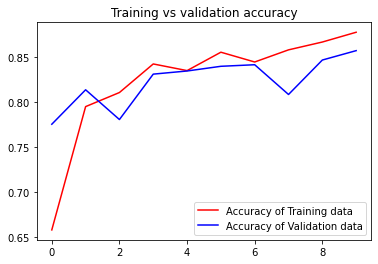

<Figure size 432x288 with 0 Axes>

In [36]:
''' training accuracy and validation accuracy graph '''
epochs = range(len(acc))
plt.plot(epochs, history.history['accuracy'], 'r', label='Accuracy of Training data')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

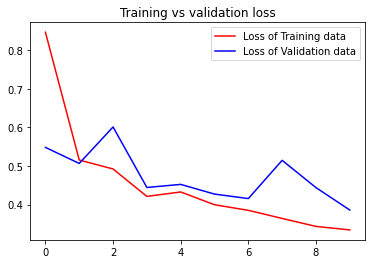

<Figure size 432x288 with 0 Axes>

In [37]:
''' training loss and validation loss graph '''
epochs = range(len(loss))
plt.plot(epochs, history.history['loss'], 'r', label='Loss of Training data')
plt.plot(epochs, history.history['val_loss'], 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()